Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [3]:
#abria a imagem
img = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

In [28]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
#Este código realiza a conversão de uma imagem colorida em tons de cinza de duas maneiras diferentes, usando as bibliotecas NumPy e OpenCV (cv2). 

#aplicando conversão básica
#numpy
img_grayscale_basic_np = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3

img_grayscale_basic_np = img_grayscale_basic_np.astype(np.uint8)
#cv2
B, G, R = cv2.split(img)

# Create a grayscale image from the B, G, and R channels
img_grayscale_basic_cv2 = (B + G + R) / 3

img_grayscale_basic_cv2 = img_grayscale_basic_cv2.astype(np.uint8)
# Convert the grayscale image to a NumPy array (optional)
img_grayscale_basic = np.array(img_grayscale_basic_cv2)
#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic_np', img_grayscale_basic_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('img_grayscale_basic', img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

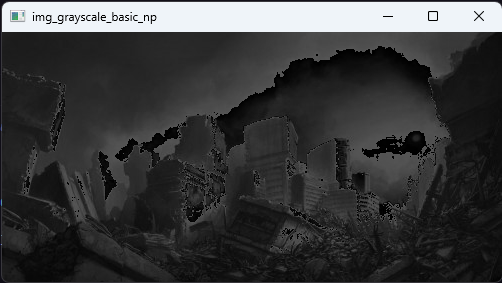

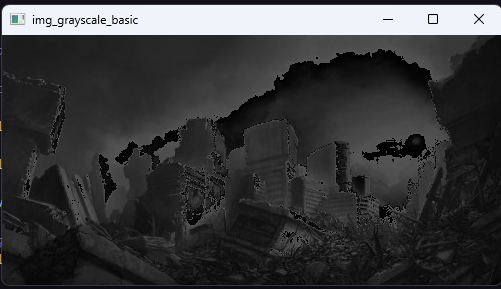

In [26]:
#Esse código também realiza uma conversão de uma imagem colorida para tons de cinza
#Nesse caso é feita uma conta em cima dos valores RGB para que a imagem seja representada melhor para a percepção humana. 

#aplicando conversão ponderada
img_grayscale_basic_np = (0.3 * img[:, :, 0] + 0.59 * img[:, :, 1] + 0.11 * img[:, :, 2]).astype(np.uint8)

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = (0.3 * B + 0.59 * G + 0.11 * R).astype(np.uint8)
img_grayscale_pondered = np.array(img_grayscale_basic_cv2)

#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic_np', img_grayscale_basic_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('img_grayscale_basic', img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

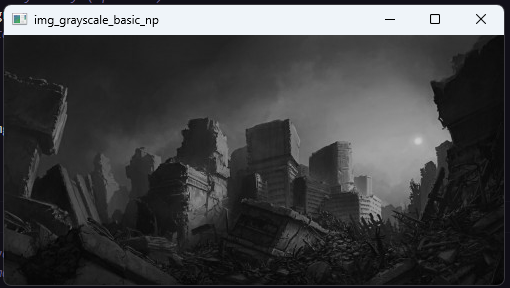

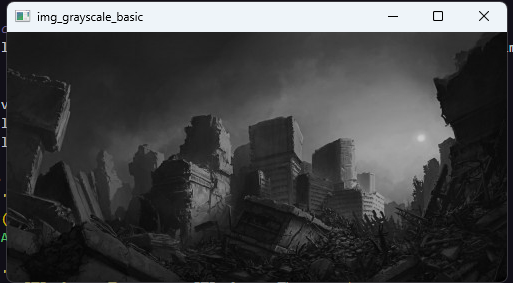

## Histograma de uma imagem

Fazer o histograma de uma imagem

In [5]:
#Esse código cria um histograma de uma imagem, que é uma representação da frequência de cada intensidade de cor na imagem. 
# Ele percorre a imagem, contando quantas vezes cada valor de intensidade de pixel ocorre e armazena essas contagens em um array.
histogram = np.zeros(256)
for pixel_value in img.ravel():
    histogram[pixel_value] += 1



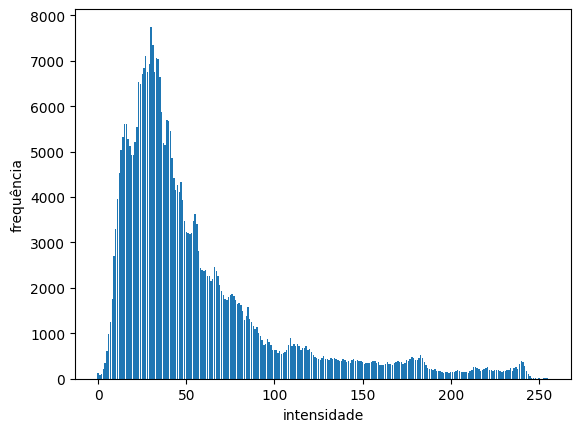

In [6]:
x = np.linspace(0, 255, 256)
plt.bar(x, histogram)
plt.xlabel('intensidade')
plt.ylabel('frequência')
plt.show()


Agora faça o histograma normalizado

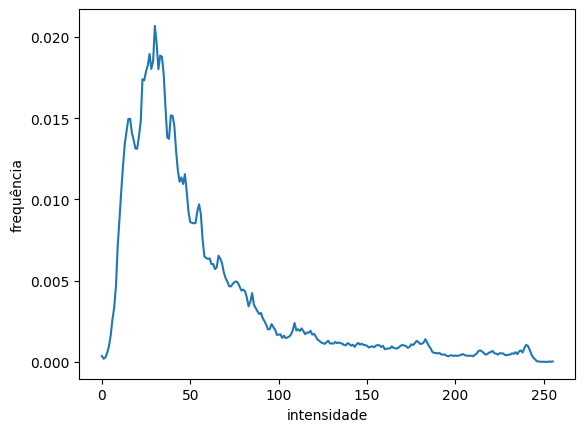

In [7]:
#Este código cria um gráfico de linha representando o histograma normalizado de uma imagem. 
# Ele normaliza as contagens de frequência no histograma, dividindo cada contagem pelo total de contagens na imagem.
histogram_normalized = histogram / float(np.sum(histogram))
x = np.linspace(0, 255, 256)

# Plot the normalized histogram
plt.plot(x, histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()



## Transformações

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

In [8]:
#negativo

#img_negative_np[?] = ?

#Carrega uma imagem colorida img_in
img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

#Cria uma cópia da imagem chamada img_out
img_out = img_in.copy()

#Inverte as cores de cada canal de cor (vermelho, verde e azul) em img_out subtraindo cada valor de pixel do canal do valor máximo (255), resultando em um efeito de negativo da imagem.
img_out[:, :, 0] = 255 - img_out[:, :, 0]  # Canal Vermelho
img_out[:, :, 1] = 255 - img_out[:, :, 1]  # Canal Verde
img_out[:, :, 2] = 255 - img_out[:, :, 2]  # Canal Azul

#Converte img_out para o tipo de dados inteiro sem sinal de 8 bits (np.uint8).
img_out = img_out.astype(np.uint8)
    
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

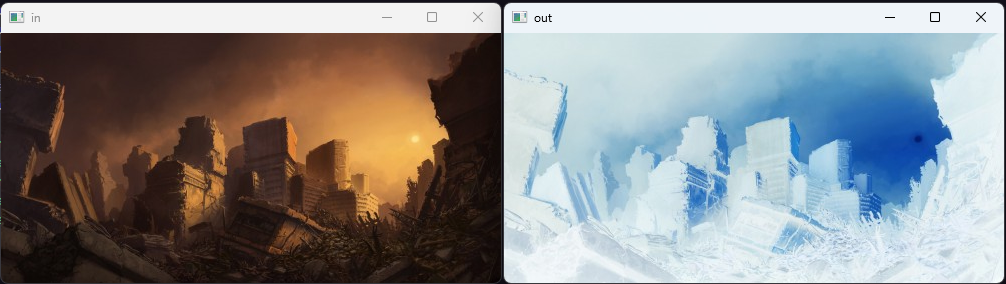

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

In [9]:

#logaritimica 
img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

img_out = img_in.copy()

c = 5

#Aplica a transformação logarítmica a cada canal de cor (vermelho, verde e azul) em img_out, utilizando a fórmula c * log(1 + valor_do_pixel). 
img_out[:, :, 0] = (c * np.log(1 + img_out[:, :, 0]))
img_out[:, :, 1] = (c * np.log(1 + img_out[:, :, 1]))
img_out[:, :, 2] = (c * np.log(1 + img_out[:, :, 2]))

img_out = img_out.astype(np.uint8)

print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\pablo\AppData\Local\Temp\ipykernel_16836\780739929.py:12: RuntimeWarning: divide by zero encountered in log
  img_out[:, :, 2] = (c * np.log(1 + img_out[:, :, 2]))
C:\Users\pablo\AppData\Local\Temp\ipykernel_16836\780739929.py:12: RuntimeWarning: invalid value encountered in cast
  img_out[:, :, 2] = (c * np.log(1 + img_out[:, :, 2]))


27


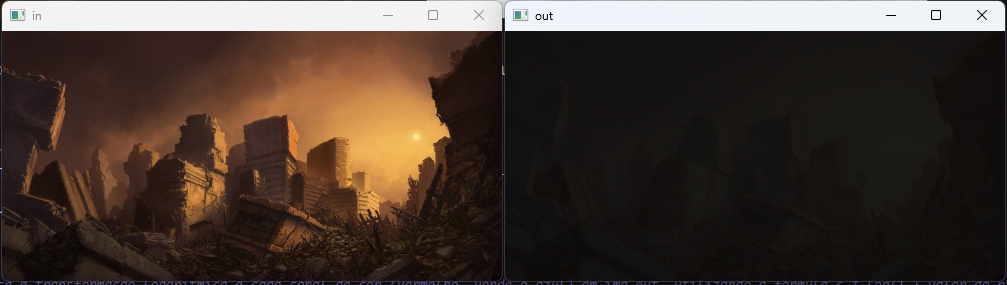


Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

In [11]:
#Aplica uma correção gamma a imagem, que é um processo usado para ajustar o contraste e brilho de uma imagem.

img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

img_out = img_in.copy()

c = 5
gamma = 0.5 

img_out[:, :, 0] = (c * (img_out[:, :, 0] ** gamma))
img_out[:, :, 1] = (c * (img_out[:, :, 1] ** gamma))
img_out[:, :, 2] = (c * (img_out[:, :, 2] ** gamma))

img_out = img_out.astype(np.uint8)


print("Maximum value of the output image:", img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


Maximum value of the output image: 79


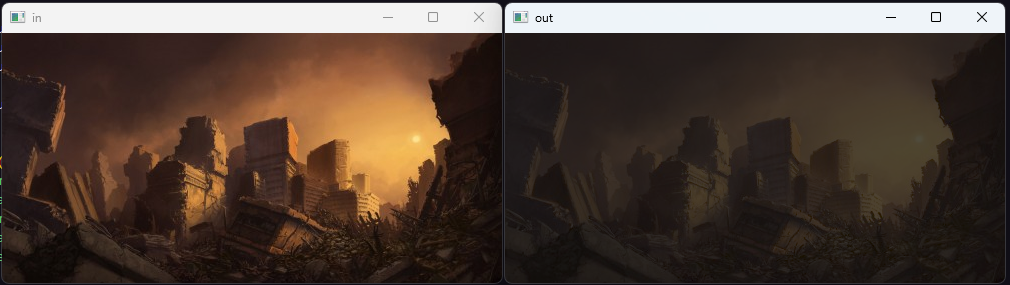

Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

In [12]:
#alargamento de contraste
img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

img_out = img_in.copy()

#Calcula os valores mínimos e máximos de intensidade de pixel em cada canal de cor (vermelho, verde e azul) na imagem original.
min_values = np.min(img_in, axis=(0, 1))
max_values = np.max(img_in, axis=(0, 1))

for i in range(3):
    img_out[:, :, i] = ((img_out[:, :, i] - min_values[i]) / (max_values[i] - min_values[i]) * 255)
            
img_out = img_out.astype(np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

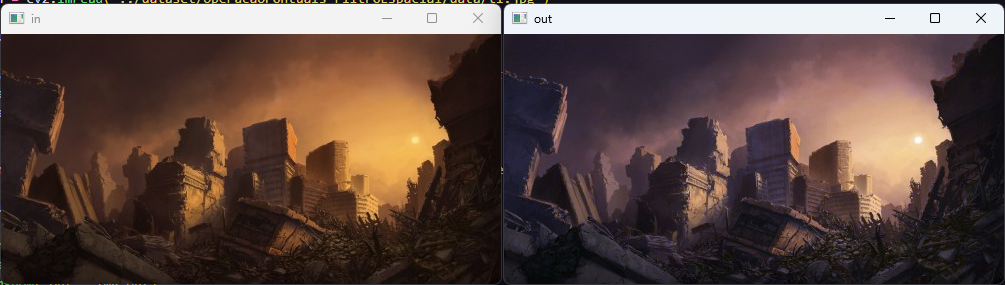

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

In [13]:
#contraste e brilho
img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

img_out = img_in.copy()

#Define valores: a (igual a 1) para o ajuste de contraste e b (igual a 10) para o ajuste de brilho.
a = 1
b = 10

#Multiplica todos os valores de pixel por a (ajuste de contraste) e, em seguida, adicionando b (ajuste de brilho).
img_out = (a * img_out + b)

img_out = img_out.astype(np.uint8)


# Exiba as imagens de entrada e saída
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


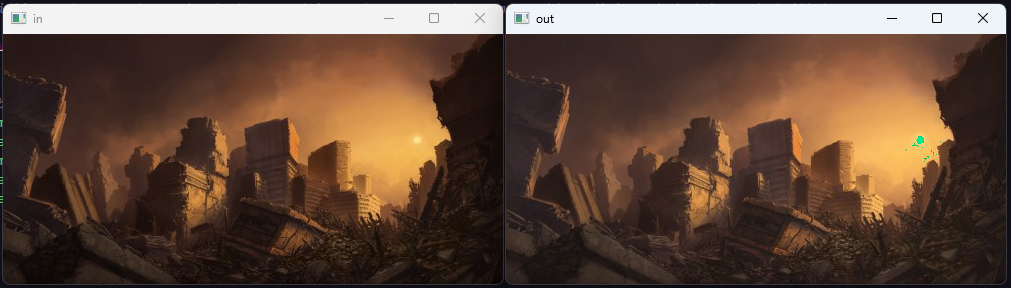

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

In [22]:
#limiar
img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg", 1)

img_out = img_in.copy()

a = 128

#Para cada canal, todos os pixels com valores menores que a são definidos como 0 (preto), e os pixels com valores maiores ou iguais a a são definidos como 255 (branco).
for i in range(3):
    img_out[img_out < a] = 0
    img_out[img_out >= a] = 255

img_out = img_out.astype(np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()



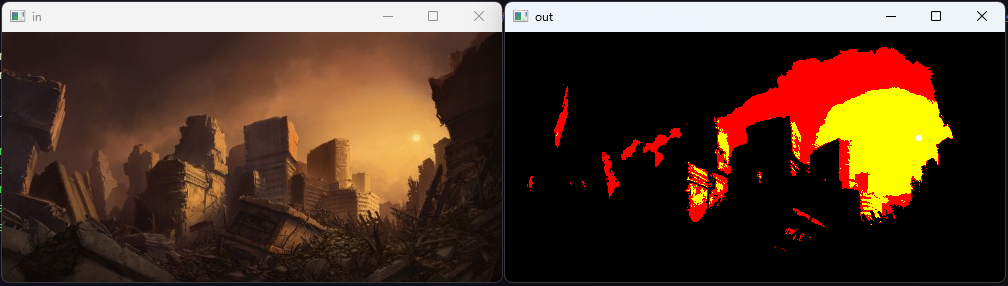

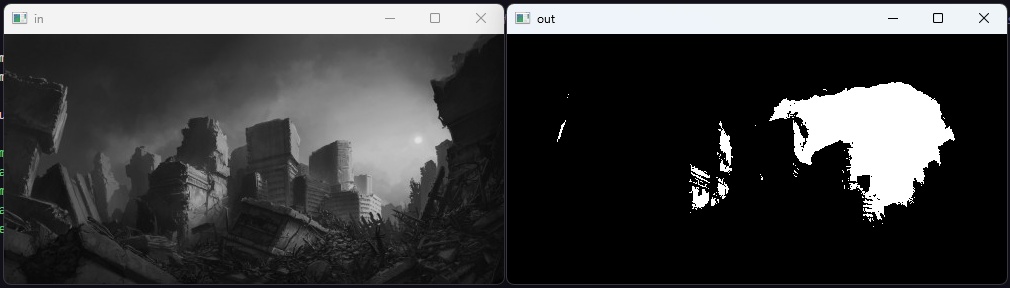

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

In [24]:
img_in = cv2.imread("../dataset/OperacaoPontuais_FiltroEspacial/data/t1.jpg")

#Define dois valores de limite
a = 127
b = 200

img_out = img_in.copy()

#Todos os pixels na imagem original com valores menores ou iguais a a são definidos como 0 (preto).
#Todos os pixels com valores maiores ou iguais a b também são definidos como 0 (preto).
#Os pixels que possuem valores entre a e b são definidos como 255 (branco).
img_out[ img_out<= a] = 0
img_out[img_out >= b] = 0
img_out[(img_out > a) & (img_out < b)] = 255

cv2.imshow('in', img_in)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()



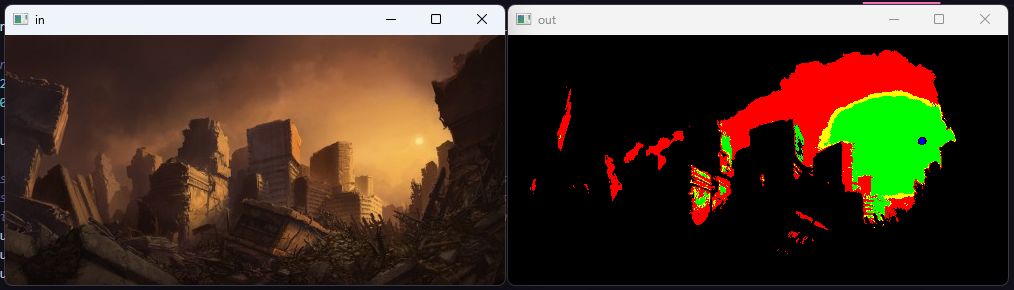